<a href="https://colab.research.google.com/github/ReyhanehHajebi/Advanced-Programming/blob/main/CA4_T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import zipfile

zip_path = "/content/drive/MyDrive/archive.zip"
extract_path = "/content/flowers"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("extract done")



extract done


In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/flowers/flowers/flowers/flower_photos/train"
val_dir   = "/content/flowers/flowers/flowers/flower_photos/validation"
test_dir  = "/content/flowers/flowers/flowers/flower_photos/test"


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

num_classes = train_generator.num_classes


Found 3540 images belonging to 5 classes.
Found 80 images belonging to 5 classes.
Found 50 images belonging to 5 classes.


In [31]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(224,224,3)),

    # Block 1
    Conv2D(32, (3,3), activation='relu', padding='same'),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    # Block 2
    Conv2D(64, (3,3), activation='relu', padding='same'),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    # Block 3
    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    verbose=1
)







/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 61s 508ms/step - accuracy: 0.2796 - loss: 1.6418 - val_accuracy: 0.5375 - val_loss: 1.0568
Epoch 2/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 56s 504ms/step - accuracy: 0.4694 - loss: 1.2363 - val_accuracy: 0.5250 - val_loss: 1.0544
Epoch 3/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 53s 481ms/step - accuracy: 0.5007 - loss: 1.1433 - val_accuracy: 0.6375 - val_loss: 0.9226
Epoch 4/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 54s 484ms/step - accuracy: 0.5878 - loss: 1.0437 - val_accuracy: 0.6000 - val_loss: 0.9286
Epoch 5/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 54s 484ms/step - accuracy: 0.6205 - loss: 1.0033 - val_accuracy: 0.6750 - val_loss: 0.8272
Epoch 6/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 53s 479ms/step - accuracy: 0.6377 - loss: 0.9507 - val_accuracy: 0.7250 - val_loss: 0.7241
Epoch 7/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 56s 499ms/step - accuracy: 0.6644 - loss: 0.8931 - val_accuracy: 0.7000 - val_loss: 0.7457
Epoch 8/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 80s 484ms/step - accuracy: 0.6866 - loss: 0

In [32]:
model.save("/content/drive/MyDrive/vgg_model.keras")

import pickle
with open("/content/vgg_history.pkl", "wb") as f:
    pickle.dump(history.history, f)

!cp /content/vgg_model.h5 /content/drive/MyDrive/
!cp /content/vgg_history.pkl /content/drive/MyDrive/

print("Transform to Google Drive")


Transform to Google Drive


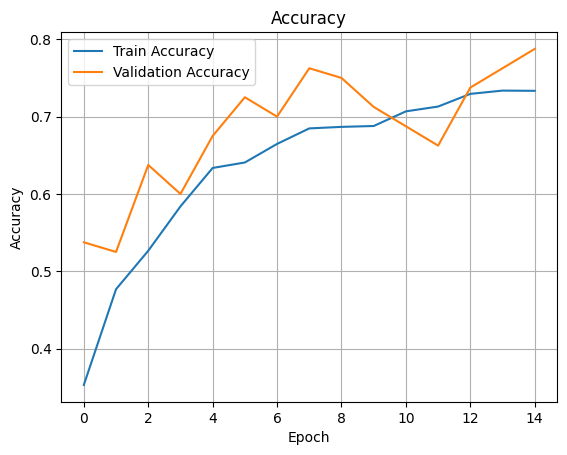

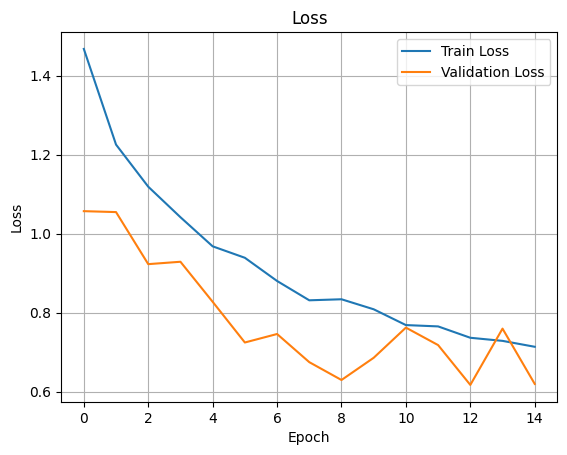

In [33]:
from tensorflow.keras.models import load_model
model = load_model("/content/drive/MyDrive/vgg_model.keras")


import pickle
with open("/content/drive/MyDrive/vgg_history.pkl", "rb") as f:
    history_dict = pickle.load(f)

import matplotlib.pyplot as plt

plt.plot(history_dict['accuracy'], label='Train Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history_dict['loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [34]:
loss, acc = model.evaluate(test_generator)
print(f" Test Accuracy: {acc:.2%}")
print(f" Test Loss: {loss:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 326ms/step - accuracy: 0.6246 - loss: 0.8282
 Test Accuracy: 64.00%
 Test Loss: 0.7741


In [35]:
from sklearn.metrics import classification_report
import numpy as np

y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes

labels = list(test_generator.class_indices.keys())

report = classification_report(y_true, y_pred, target_names=labels)
print(report)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 317ms/step
              precision    recall  f1-score   support

       daisy       0.60      0.90      0.72        10
   dandelion       0.60      0.60      0.60        10
       roses       0.40      0.20      0.27        10
  sunflowers       0.90      0.90      0.90        10
      tulips       0.60      0.60      0.60        10

    accuracy                           0.64        50
   macro avg       0.62      0.64      0.62        50
weighted avg       0.62      0.64      0.62        50



# ResNet50




In [36]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input

base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224,224,3)))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model_resnet = Model(inputs=base_model.input, outputs=output_layer)

model_resnet.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_resnet = model_resnet.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    verbose=1
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_481']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


111/111 ━━━━━━━━━━━━━━━━━━━━ 79s 583ms/step - accuracy: 0.2342 - loss: 1.8005 - val_accuracy: 0.3500 - val_loss: 1.5833
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 53s 475ms/step - accuracy: 0.2246 - loss: 1.7584 - val_accuracy: 0.3750 - val_loss: 1.5650
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 53s 477ms/step - accuracy: 0.2644 - loss: 1.6608 - val_accuracy: 0.4000 - val_loss: 1.5468
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 53s 476ms/step - accuracy: 0.2406 - loss: 1.6737 - val_accuracy: 0.4000 - val_loss: 1.5399
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 54s 489ms/step - accuracy: 0.2528 - loss: 1.6390 - val_accuracy: 0.4000 - val_loss: 1.5233
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 53s 476ms/step - accuracy: 0.2454 - loss: 1.6385 - val_accuracy: 0.4000 - val_loss: 1.5139
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 53s 475ms/step - accuracy: 0.2706 - loss: 1.5991 - val_accuracy: 0.3625 - val_loss: 1.5038
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 53s 474ms/step - accuracy: 0.2741 - loss: 1.6046 - val

In [37]:
for layer in base_model.layers[-30:]:
    layer.trainable = True

model_resnet.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_finetune = model_resnet.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    verbose=1
)


Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 83s 586ms/step - accuracy: 0.3100 - loss: 1.8823 - val_accuracy: 0.2250 - val_loss: 1.9542
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 54s 488ms/step - accuracy: 0.4434 - loss: 1.3554 - val_accuracy: 0.3000 - val_loss: 1.8081
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 81s 480ms/step - accuracy: 0.4819 - loss: 1.2852 - val_accuracy: 0.3625 - val_loss: 1.4228
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 84s 501ms/step - accuracy: 0.5496 - loss: 1.1550 - val_accuracy: 0.6500 - val_loss: 1.0556
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 54s 485ms/step - accuracy: 0.5509 - loss: 1.1260 - val_accuracy: 0.5875 - val_loss: 1.1129
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 82s 485ms/step - accuracy: 0.5989 - loss: 1.0371 - val_accuracy: 0.6500 - val_loss: 0.9498
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 53s 482ms/step - accuracy: 0.6158 - loss: 1.0114 - val_accuracy: 0.6375 - val_loss: 0.9148
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 55s 496ms/step - accuracy: 0.6169 - loss: 1

In [38]:
loss, acc = model_resnet.evaluate(test_generator)
print(f" ResNet Test Accuracy: {acc:.2%}")
print(f" ResNet Test Loss: {loss:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.6454 - loss: 1.0760
 ResNet Test Accuracy: 64.00%
 ResNet Test Loss: 1.0860


In [39]:
for layer in base_model.layers[-50:]:
    layer.trainable = True

from tensorflow.keras.optimizers import Adam

model_resnet.compile(
    optimizer=Adam(learning_rate=5e-6),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history_refined = model_resnet.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 91s 612ms/step - accuracy: 0.3361 - loss: 1.8106 - val_accuracy: 0.2625 - val_loss: 1.7773
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 56s 503ms/step - accuracy: 0.4948 - loss: 1.2747 - val_accuracy: 0.2750 - val_loss: 1.4960
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 55s 491ms/step - accuracy: 0.5318 - loss: 1.1805 - val_accuracy: 0.5375 - val_loss: 1.1172
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 55s 491ms/step - accuracy: 0.5769 - loss: 1.0995 - val_accuracy: 0.5750 - val_loss: 1.0194
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 54s 489ms/step - accuracy: 0.5681 - loss: 1.0764 - val_accuracy: 0.6375 - val_loss: 0.9948
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 57s 510ms/step - accuracy: 0.6044 - loss: 1.0231 - val_accuracy: 0.6000 - val_loss: 0.9193
Epoch 7/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 79s 488ms/step - accuracy: 0.6109 - loss: 1.0009 - val_accuracy: 0.6375 - val_loss: 0.8935
Epoch 8/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 55s 491ms/step - accuracy: 0.6309 - loss: 0

In [40]:
loss, acc = model_resnet.evaluate(test_generator)
print(f" Refined ResNet Test Accuracy: {acc:.2%}")
print(f" Refined ResNet Test Loss: {loss:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.5875 - loss: 1.0387
 Refined ResNet Test Accuracy: 60.00%
 Refined ResNet Test Loss: 1.0155


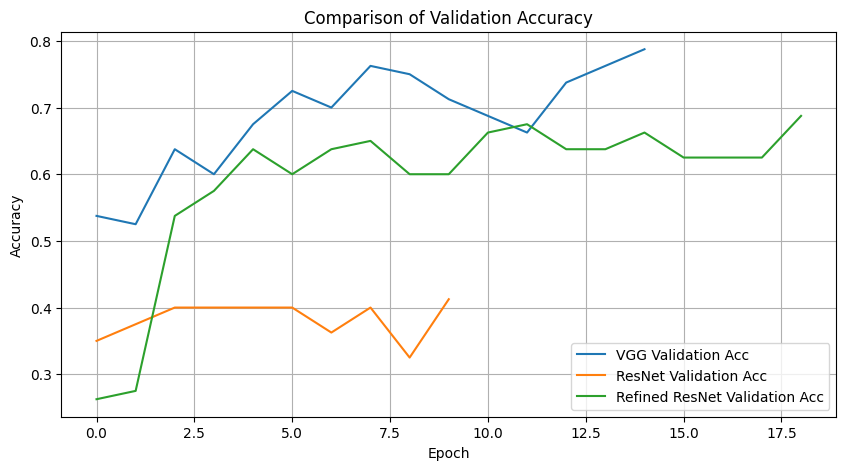

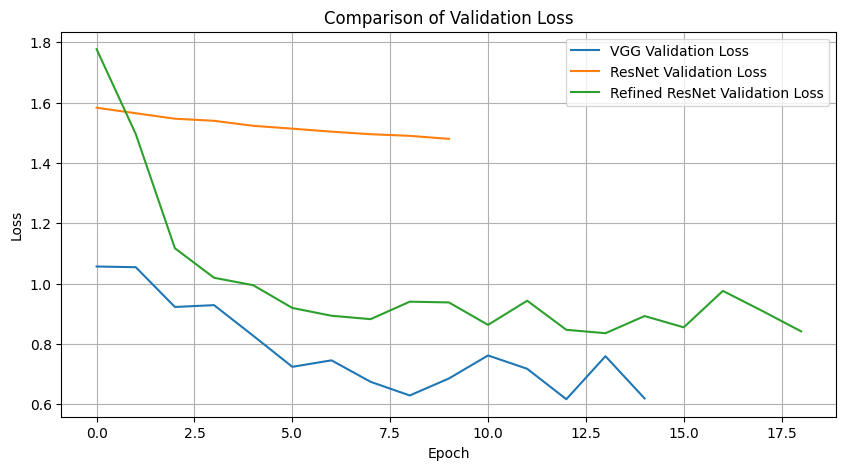

In [41]:
import matplotlib.pyplot as plt

# (Accuracy)
plt.figure(figsize=(10, 5))
plt.plot(history.history['val_accuracy'], label='VGG Validation Acc')
plt.plot(history_resnet.history['val_accuracy'], label='ResNet Validation Acc')
plt.plot(history_refined.history['val_accuracy'], label='Refined ResNet Validation Acc')
plt.title('Comparison of Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# (Loss)
plt.figure(figsize=(10, 5))
plt.plot(history.history['val_loss'], label='VGG Validation Loss')
plt.plot(history_resnet.history['val_loss'], label='ResNet Validation Loss')
plt.plot(history_refined.history['val_loss'], label='Refined ResNet Validation Loss')
plt.title('Comparison of Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [42]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_vgg = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes
labels = list(test_generator.class_indices.keys())

print(" VGG Performance:")
print(classification_report(y_true, y_pred_vgg, target_names=labels))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step 
 VGG Performance:
              precision    recall  f1-score   support

       daisy       0.60      0.90      0.72        10
   dandelion       0.60      0.60      0.60        10
       roses       0.40      0.20      0.27        10
  sunflowers       0.90      0.90      0.90        10
      tulips       0.60      0.60      0.60        10

    accuracy                           0.64        50
   macro avg       0.62      0.64      0.62        50
weighted avg       0.62      0.64      0.62        50



In [43]:
y_pred_resnet = np.argmax(model_resnet.predict(test_generator), axis=1)

print(" ResNet Performance:")
print(classification_report(y_true, y_pred_resnet, target_names=labels))


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_481']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)


1/2 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_481']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 4s/step
 ResNet Performance:
              precision    recall  f1-score   support

       daisy       0.56      0.90      0.69        10
   dandelion       0.67      0.40      0.50        10
       roses       0.57      0.40      0.47        10
  sunflowers       0.62      0.80      0.70        10
      tulips       0.62      0.50      0.56        10

    accuracy                           0.60        50
   macro avg       0.61      0.60      0.58        50
weighted avg       0.61      0.60      0.58        50



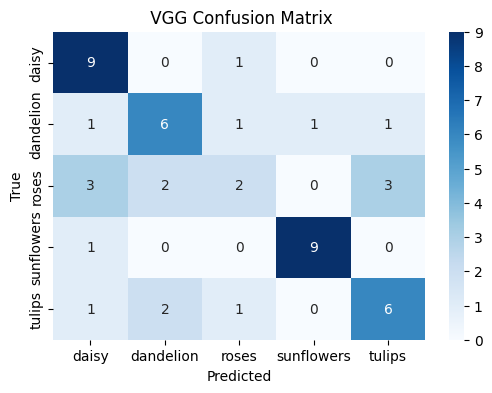

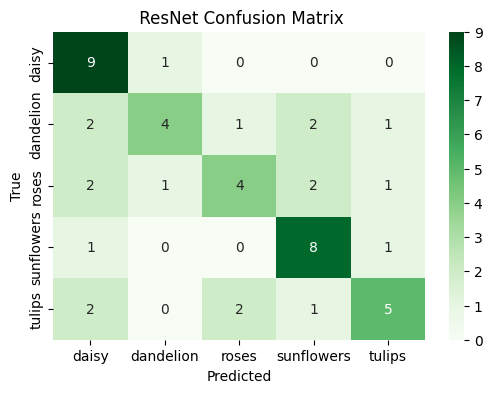

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# VGG
cm_vgg = confusion_matrix(y_true, y_pred_vgg)
plt.figure(figsize=(6,4))
sns.heatmap(cm_vgg, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title(' VGG Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ResNet
cm_resnet = confusion_matrix(y_true, y_pred_resnet)
plt.figure(figsize=(6,4))
sns.heatmap(cm_resnet, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.title(' ResNet Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


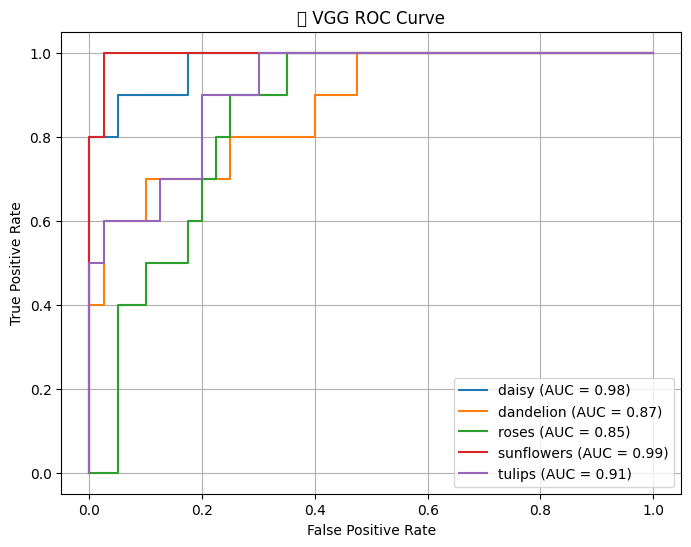

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


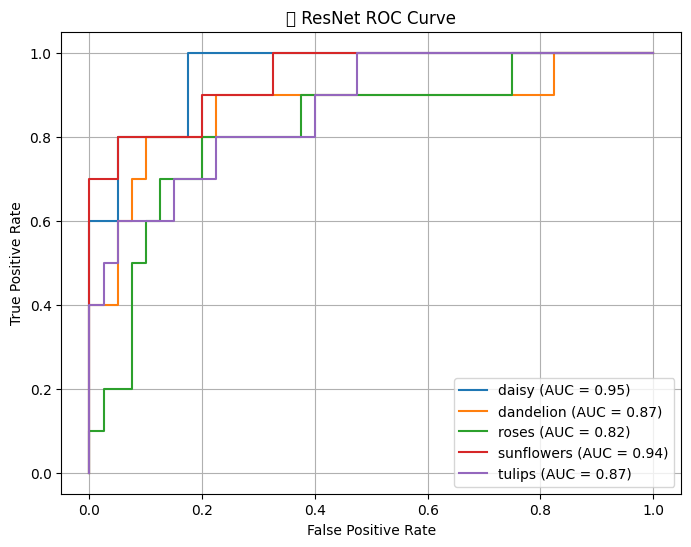

In [45]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

y_true_bin = label_binarize(y_true, classes=list(range(len(labels))))

y_prob_vgg = model.predict(test_generator)
y_prob_resnet = model_resnet.predict(test_generator)

plt.figure(figsize=(8,6))
for i in range(len(labels)):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_prob_vgg[:, i])
    plt.plot(fpr, tpr, label=f'{labels[i]} (AUC = {auc(fpr, tpr):.2f})')
plt.title('🔵 VGG ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
for i in range(len(labels)):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_prob_resnet[:, i])
    plt.plot(fpr, tpr, label=f'{labels[i]} (AUC = {auc(fpr, tpr):.2f})')
plt.title('🟢 ResNet ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()
